Train HOG Classifier
===


In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
import pickle
from sklearn.svm import LinearSVC
from lesson_functions import *
from find_cars import *

### Load classifier

In [2]:
svc_data = load_classifier('HOGClassifier.p')
print(svc_data)

{'orient': 9, 'spatial_size': (32, 32), 'spatial_feat': True, 'hog_feat': True, 'pix_per_cell': 8, 'cell_per_block': 2, 'hist_bins': 32, 'hog_channel': 'ALL', 'svc': LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), 'hist_feat': True, 'color_space': 'YCrCb', 'X_scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


### Test images

In [3]:
images = sorted(glob.glob('test_images/out*.png'))
print(images)

img = mpimg.imread('test_images/test4.jpg')
if img.shape[2] > 3:
    img = img[:,:,0:3]

[]


### Hog Sub-sampling Window Search

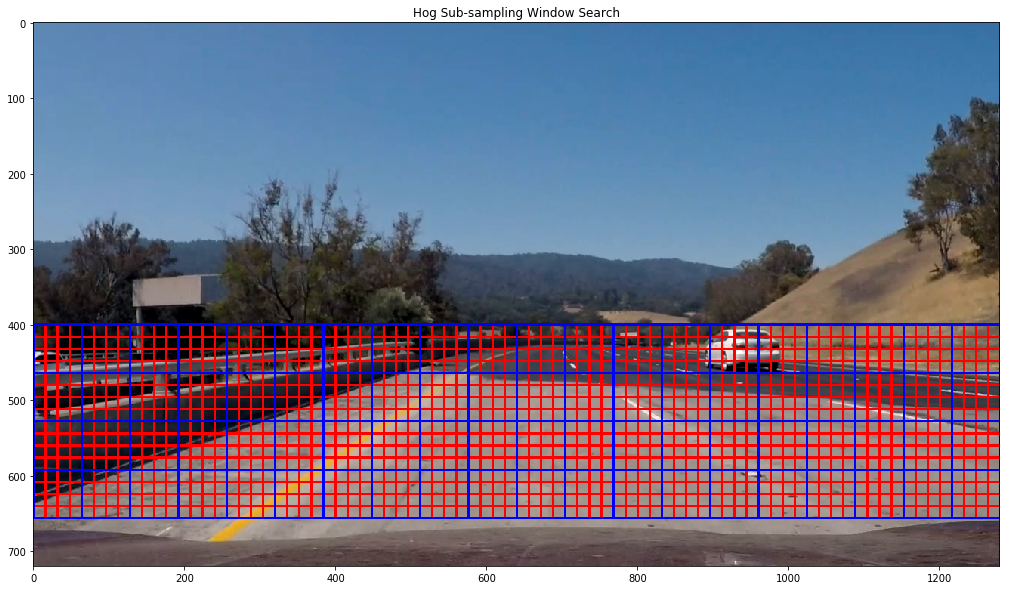

In [4]:
img = mpimg.imread('test_images/test4.jpg')
img = mpimg.imread('temp_data/frames/project_video/604.jpg')

if img.shape[2] > 3:
    img = img[:,:,0:3]

draw_img = np.copy(img)

ystart = 400
ystop = 656
scale = 1

bboxes = find_cars_grid(img, ystart, ystop, scale, cells_per_step=2)
draw_img = draw_boxes(draw_img, bboxes, color=(255, 0, 0), thick=2)

bboxes = find_cars_grid(img, ystart, ystop, scale, cells_per_step=8)
draw_img = draw_boxes(draw_img, bboxes, color=(0, 0, 255), thick=2)

fig = plt.figure(figsize=(20,10))
plt.imshow(draw_img)
plt.title('Hog Sub-sampling Window Search')
plt.show()

### Multiscale grid for vehicle detection

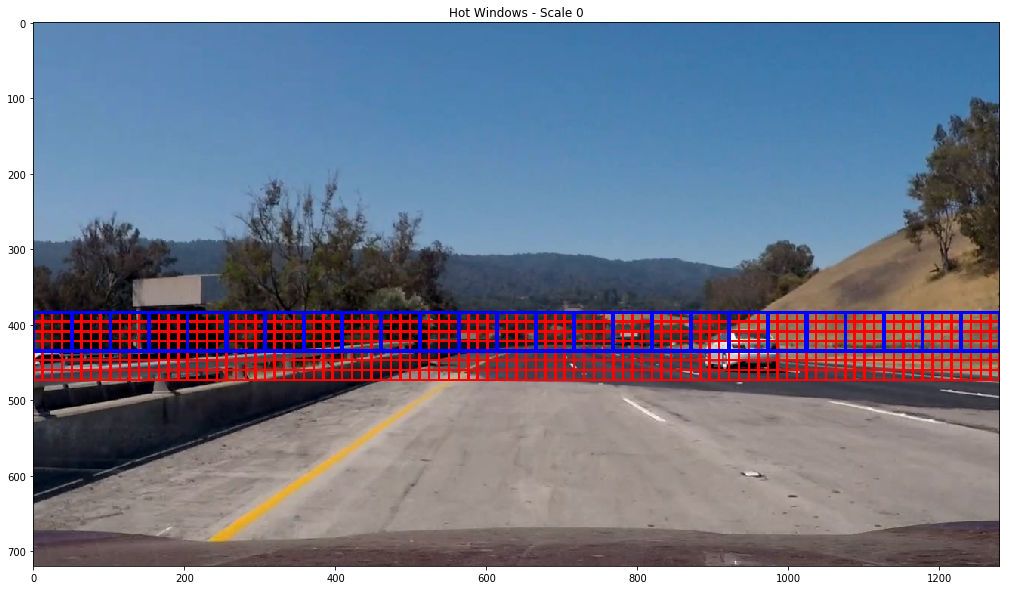

In [5]:
# Scale 0
img = mpimg.imread('test_images/test4.jpg')
img = mpimg.imread('temp_data/frames/project_video/604.jpg')

if img.shape[2] > 3:
    img = img[:,:,0:3]

draw_img0 = draw_cars_grids(img, scales=[0])

fig = plt.figure(figsize=(20,10))
plt.imshow(draw_img0)
plt.title('Hot Windows - Scale 0')
plt.show()

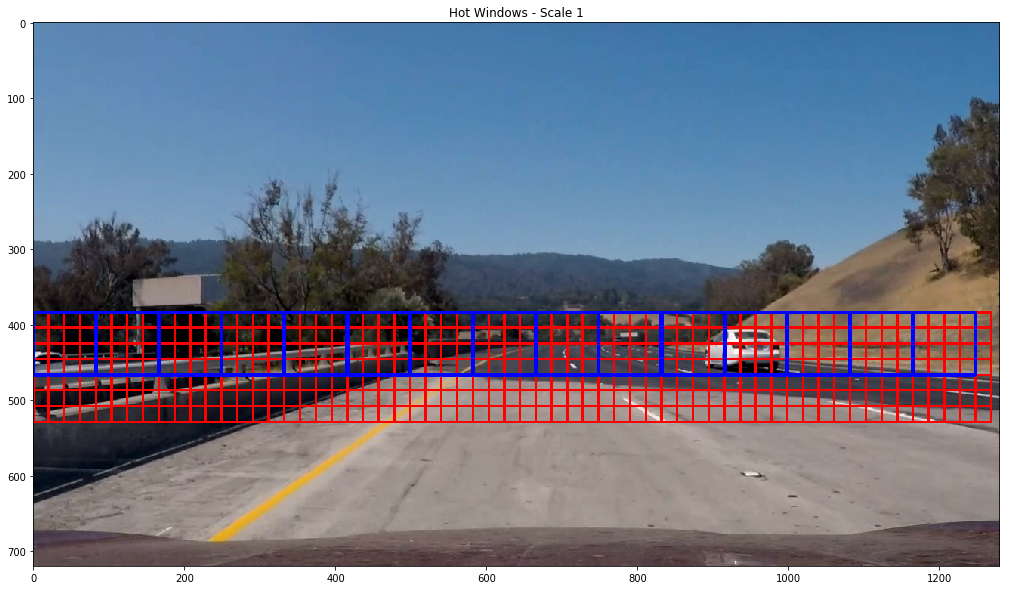

In [6]:
# Scale 1
#img = mpimg.imread('test_images/test4.jpg')
img = mpimg.imread('temp_data/frames/project_video/604.jpg')
if img.shape[2] > 3:
    img = img[:,:,0:3]

draw_img1 = draw_cars_grids(img, scales=[1])
draw_img2 = draw_cars_grids(img, scales=[2])
draw_img3 = draw_cars_grids(img, scales=[3])

fig = plt.figure(figsize=(20,10))
plt.imshow(draw_img1)
plt.title('Hot Windows - Scale 1')
plt.show()

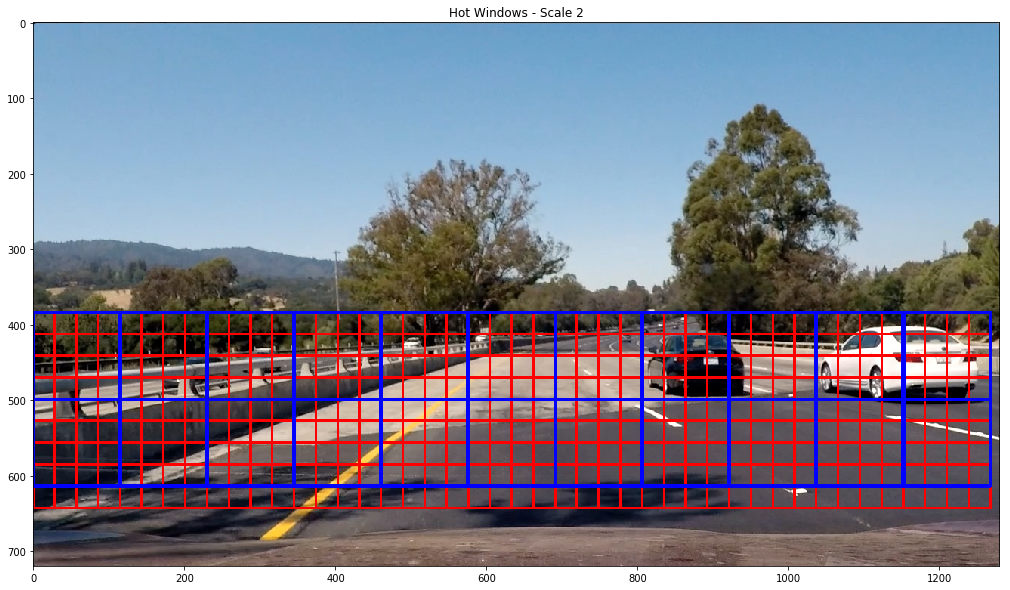

In [7]:
# Scale 2
img = mpimg.imread('test_images/test4.jpg')
if img.shape[2] > 3:
    img = img[:,:,0:3]

draw_img2 = draw_cars_grids(img, scales=[2])

fig = plt.figure(figsize=(20,10))
plt.imshow(draw_img2)
plt.title('Hot Windows - Scale 2')
plt.show()

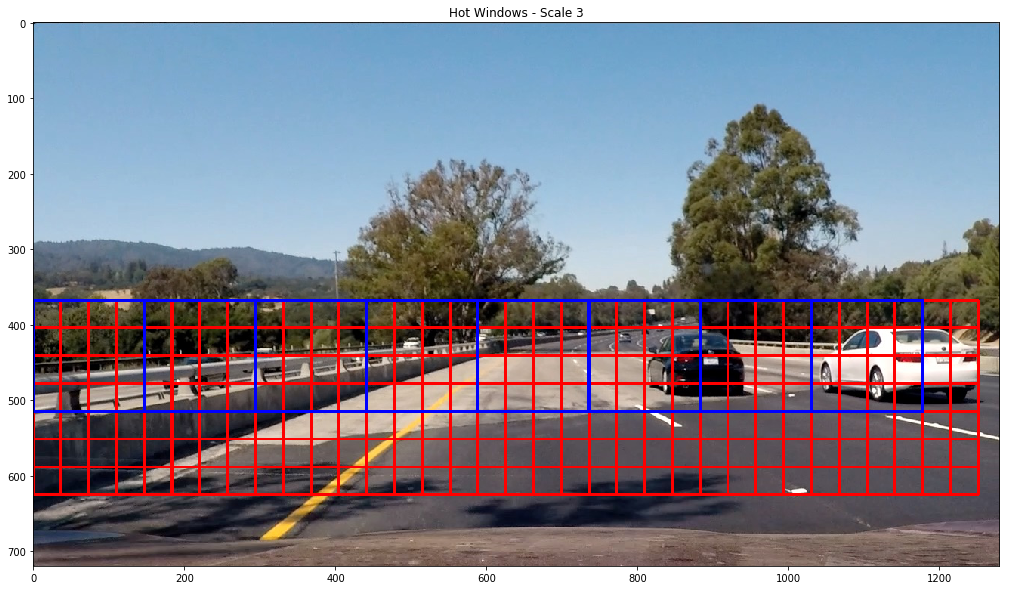

In [8]:
# Scale 3
img = mpimg.imread('test_images/test4.jpg')
if img.shape[2] > 3:
    img = img[:,:,0:3]

draw_img3 = draw_cars_grids(img, scales=[3])

fig = plt.figure(figsize=(20,10))
plt.imshow(draw_img3)
plt.title('Hot Windows - Scale 3')
plt.show()

1.02823 Seconds to detect
0 cars found


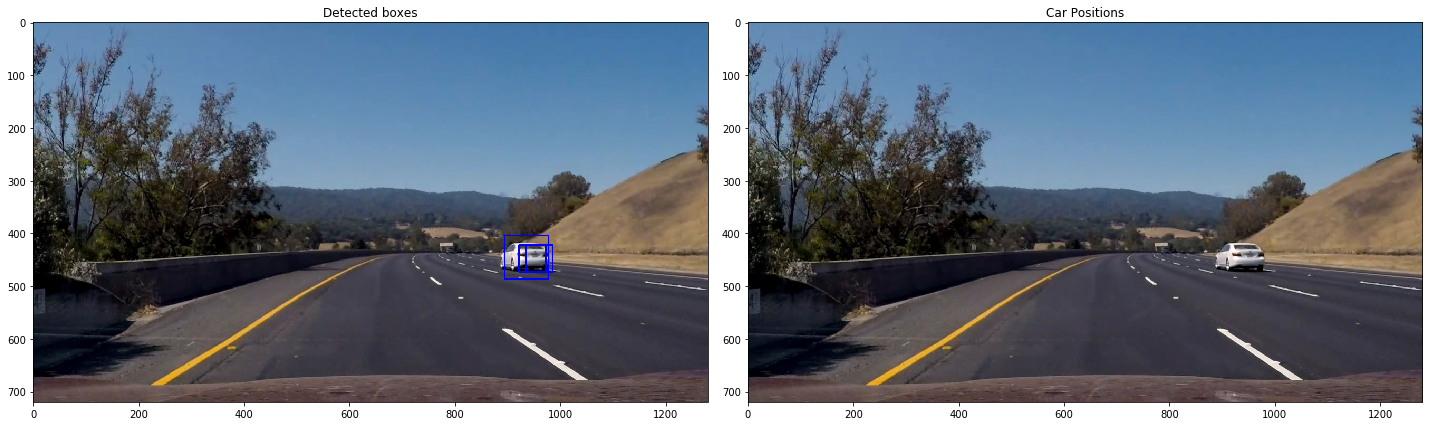

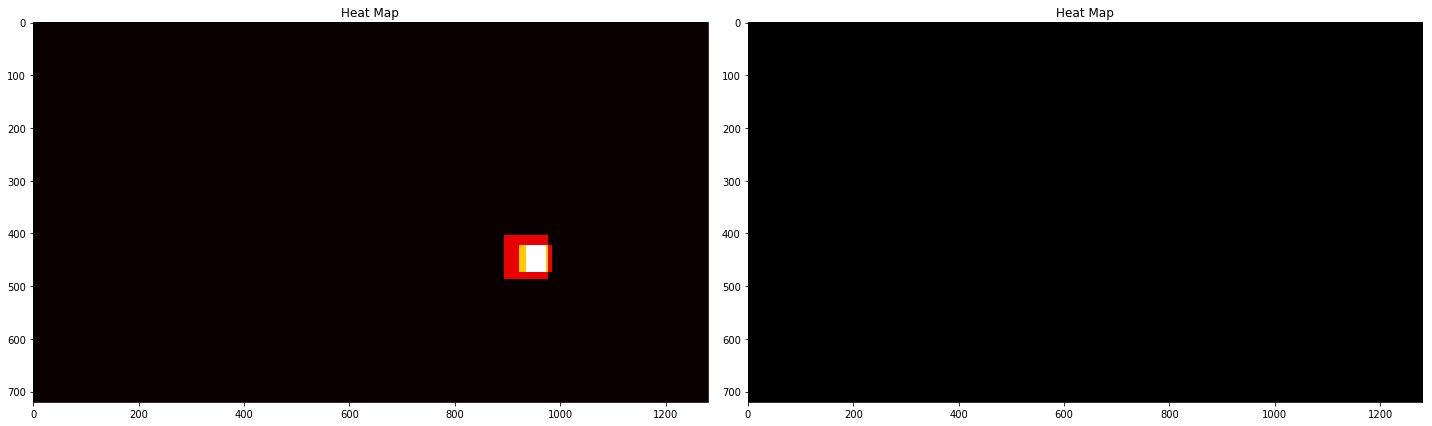

In [33]:
from find_cars import load_classifier, find_cars_multiscale, detect_vehicles
from scipy.ndimage.measurements import label
%matplotlib inline

load_classifier()

#img = mpimg.imread('test_images/test1.jpg')
#img = mpimg.imread('test_images/test2.jpg')
#img = mpimg.imread('test_images/test3.jpg')
img = mpimg.imread('test_images/test4.jpg')
#img = mpimg.imread('test_images/test5.jpg')
#img = mpimg.imread('test_images/test6.jpg')

#img = mpimg.imread('temp_data/frames/project_video/718.jpg')
img = mpimg.imread('temp_data/frames/project_video/631.jpg')
img = mpimg.imread('temp_data/frames/project_video/627.jpg')
#img = mpimg.imread('temp_data/frames/project_video/618.jpg')
#img = mpimg.imread('temp_data/frames/project_video/604.jpg')
#img = mpimg.imread('temp_data/frames/project_video/544.jpg')

if img.shape[2] > 3:
    img = img[:,:,0:3]

# if jpeg
draw_img = np.copy(img)
img = img.astype(np.float32)/255

#draw_img = draw_cars_grids(draw_img, scales=[2])

t=time.time()
bboxes = find_cars_multiscale(img, verbose=False)
t2 = time.time()
print(round(t2-t, 5), 'Seconds to detect')

bboxes, hot_windows, heatmap, labels = detect_vehicles(img, 0, thresh=3, useHeatmap=True, verbose=True)

print(len(bboxes), 'cars found')

draw_img1 = draw_boxes(draw_img, hot_windows, thick=2)
draw_img2 = draw_boxes(draw_img, bboxes)

fig = plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(draw_img1)
plt.title('Detected boxes')

plt.subplot(122)
plt.imshow(draw_img2)
plt.title('Car Positions')
fig.tight_layout()
plt.show()

fig = plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')

plt.subplot(122)
plt.imshow(labels[0], cmap='gray')
plt.title('Heat Map')
fig.tight_layout()
plt.show()

### Test prediction

{'hist_bins': 32, 'orient': 9, 'hog_channel': 'ALL', 'spatial_size': (32, 32), 'spatial_feat': True, 'hog_feat': True, 'pix_per_cell': 8, 'color_space': 'YCrCb', 'hist_feat': True, 'cell_per_block': 2}
1.297 Seconds to detect using scale: 1.1


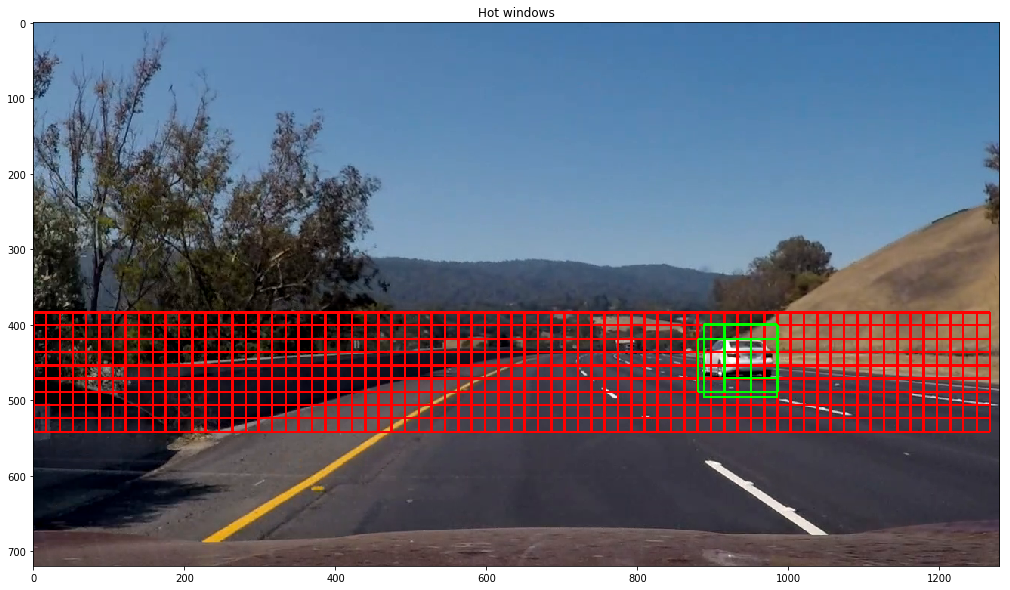

In [35]:
from find_cars import find_cars
%matplotlib inline

dist_pickle = pickle.load( open("HOGClassifier.p", "rb" ) )
svc = dist_pickle["svc"]
X_scaler = dist_pickle["scaler"]

params = {}
params['color_space']    = dist_pickle['color_space']
params['orient']         = dist_pickle['orient']
params['pix_per_cell']   = dist_pickle['pix_per_cell']
params['cell_per_block'] = dist_pickle['cell_per_block']
params['hog_channel']    = dist_pickle['hog_channel']
params['spatial_size']   = dist_pickle['spatial_size']
params['hist_bins']      = dist_pickle['hist_bins']
params['spatial_feat']   = dist_pickle['spatial_feat']
params['hist_feat']      = dist_pickle['hist_feat']
params['hog_feat']       = dist_pickle['hog_feat']

print(params)

#img = mpimg.imread('test_images/test1.jpg')
#img = mpimg.imread('test_images/test2.jpg')
#img = mpimg.imread('test_images/test3.jpg')
img = mpimg.imread('test_images/test4.jpg')
#img = mpimg.imread('test_images/test5.jpg')
#img = mpimg.imread('test_images/test6.jpg')

#img = mpimg.imread('temp_data/frames/project_video/718.jpg')
#img = mpimg.imread('temp_data/frames/project_video/631.jpg')
img = mpimg.imread('temp_data/frames/project_video/627.jpg')
#img = mpimg.imread('temp_data/frames/project_video/618.jpg')
#img = mpimg.imread('temp_data/frames/project_video/604.jpg')
#img = mpimg.imread('temp_data/frames/project_video/544.jpg')

if img.shape[2] > 3:
    img = img[:,:,0:3]

ystart1 = 360
ystop1 = 656
    
draw_img = np.copy(img)
img = img.astype(np.float32)/255

t=time.time()

bboxes = []

# scale 0

#scale0 = 1
scale0 = 0.8
ystart0 = 400 - 2*8
ystop0 = 400 + 64*1 + 2*8

grid_boxes = find_cars_grid(img, ystart=ystart0, ystop=ystop0, scale=scale0)
#draw_img = draw_boxes(draw_img, grid_boxes, color=(0, 0, 255), thick=6)

grid_boxes = find_cars_grid(img, ystart=ystart0, ystop=ystop0, scale=scale0, cells_per_step=2)
#draw_img = draw_boxes(draw_img, grid_boxes, color=(255, 0, 0), thick=2)

boxes = find_cars(img, ystart0, ystop0, scale0, svc, X_scaler, params, cells_per_step = 2)
#if len(boxes): bboxes.extend(boxes)


# scale 1
scale1 = 1.1
ystart1 = 400-2*8
ystop1 = 400 + 64*2 + 2*8
#ystop1 = 656

grid_boxes = find_cars_grid(img, ystart=ystart1, ystop=ystop1, scale=scale1)
#draw_img = draw_boxes(draw_img, grid_boxes, color=(0, 0, 255), thick=6)

grid_boxes = find_cars_grid(img, ystart=ystart1, ystop=ystop1, scale=scale1, cells_per_step=2)
draw_img = draw_boxes(draw_img, grid_boxes, color=(255, 0, 0), thick=2)

boxes = find_cars(img, ystart1, ystop1, scale1, svc, X_scaler, params, cells_per_step = 2)
if len(boxes): bboxes.extend(boxes)

        
# scale 2
scale2 = 1.5
ystart2 = 400# - 2*8*3//2
#ystop2 = 400 + 64*3 + 2*8
ystop2 = 656


grid_boxes = find_cars_grid(img, ystart=ystart2, ystop=ystop2, scale=scale2)
#draw_img = draw_boxes(draw_img, grid_boxes, color=(0, 0, 255), thick=6)

grid_boxes = find_cars_grid(img, ystart=ystart2, ystop=ystop2, scale=scale2, cells_per_step=2)
#draw_img = draw_boxes(draw_img, grid_boxes, color=(255, 0, 0), thick=2)

boxes = find_cars(img, ystart2, ystop2, scale2, svc, X_scaler, params)
if len(boxes): bboxes.extend(boxes)

# scale 3
scale3 = 2.3
ystart3 = 400-32
ystop3 = 656

grid_boxes = find_cars_grid(img, ystart=ystart3, ystop=ystop3, scale=scale3)
#draw_img = draw_boxes(draw_img, grid_boxes, color=(0, 0, 255), thick=6)

grid_boxes = find_cars_grid(img, ystart=ystart3, ystop=ystop3, scale=scale3, cells_per_step=2)
#draw_img = draw_boxes(draw_img, grid_boxes, color=(255, 0, 0), thick=2)

boxes = find_cars(img, ystart3, ystop3, scale3, svc, X_scaler, params)
if len(boxes): bboxes.extend(boxes)
    
    
t2 = time.time()
print(round(t2-t, 5), 'Seconds to detect using scale:', scale1)

draw_img = draw_boxes(draw_img, bboxes, color=(0, 255, 0), thick=2)

fig = plt.figure(figsize=(20,10))
plt.imshow(draw_img)
plt.title('Hot windows')
plt.show()
